In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
anime_df = pd.read_csv('./data/anime.csv')
user_ratings_df = pd.read_csv('./data/user_ratings.csv')

# Exploring the Anime Dataset

In [3]:
anime_df.head()

,id,title,start_date,end_date,synopsis,score,rank,popularity,num_list_users,num_scoring_users,media_type,status,genres,num_episodes,start_season,broadcast_day,broadcast_time,source,rating,studios
0,5114,Fullmetal Alchemist: Brotherhood,2009-04-05,2010-07-04,After a horrific alchemy experiment goes wrong...,9.10,1.0,3,3240265,2056814,tv,finished_airing,"Action,Adventure,Drama,Fantasy,Military,Shounen",64,spring,sunday,17:00,manga,r,Bones
1,9253,Steins;Gate,2011-04-06,2011-09-14,Eccentric scientist Rintarou Okabe has a never...,9.07,2.0,13,2489957,1361494,tv,finished_airing,"Drama,Psychological,Sci-Fi,Suspense,Time Travel",24,spring,wednesday,02:05,visual_novel,pg_13,White Fox
2,28977,Gintama°,2015-04-08,2016-03-30,"Gintoki, Shinpachi, and Kagura return as the f...",9.06,3.0,336,610158,243298,tv,finished_airing,"Action,Comedy,Gag Humor,Historical,Parody,Samu...",51,spring,wednesday,18:00,manga,pg_13,Bandai Namco Pictures
3,41467,Bleach: Sennen Kessen-hen,2022-10-11,2022-12-27,Substitute Soul Reaper Ichigo Kurosaki spends ...,9.05,4.0,432,489199,245969,tv,finished_airing,"Action,Adventure,Fantasy,Shounen",13,fall,tuesday,00:00,manga,r,Pierrot
4,39486,Gintama: The Final,2021-01-08,2021-01-08,Two years have passed following the Tendoshuu'...,9.05,5.0,1550,140032,67119,movie,finished_airing,"Action,Comedy,Drama,Gag Humor,Historical,Parod...",1,winter,NaN,NaN,manga,pg_13,Bandai Namco Pictures


In [4]:
anime_df.describe()

,id,score,rank,popularity,num_list_users,num_scoring_users,num_episodes
count,25464.000000,16437.000000,20572.000000,25464.000000,2.546400e+04,2.546400e+04,25464.000000
mean,30389.581331,6.392132,10286.498639,12732.475613,3.750834e+04,1.910739e+04,14.458255
std,18229.926296,0.910596,5938.769335,7350.955437,1.588925e+05,9.513206e+04,47.602814
min,1.000000,1.850000,1.000000,1.000000,1.700000e+01,0.000000e+00,0.000000
25%,10801.750000,5.750000,5143.750000,6366.750000,2.190000e+02,5.200000e+01,1.000000
50%,35071.500000,6.390000,10286.500000,12732.500000,1.059500e+03,3.030000e+02,2.000000
75%,45886.750000,7.060000,15429.250000,19098.250000,9.356000e+03,3.365000e+03,13.000000
max,56949.000000,9.100000,20572.000000,25464.000000,3.819654e+06,2.711496e+06,3057.000000


## Getting the Genre Distribution from the Dataset

### Only Use the Id and Genre Columns

In [5]:
anime_id_genres_df = anime_df[['id', 'genres']]
anime_id_genres_df.head()

,id,genres
0,5114,"Action,Adventure,Drama,Fantasy,Military,Shounen"
1,9253,"Drama,Psychological,Sci-Fi,Suspense,Time Travel"
2,28977,"Action,Comedy,Gag Humor,Historical,Parody,Samu..."
3,41467,"Action,Adventure,Fantasy,Shounen"
4,39486,"Action,Comedy,Drama,Gag Humor,Historical,Parod..."


### Split the genres column into multiple columns

In [6]:
anime_id_genre_split_df = pd.DataFrame(anime_id_genres_df.genres.str.split(',').apply(pd.Series))
anime_id_genre_split_df.index = anime_id_genres_df.set_index(['id']).index
anime_id_genre_split_df = anime_id_genre_split_df.stack().reset_index([0, 'id'])
anime_id_genre_split_df.columns = ['id', 'genre']

### Convert the series into a genre and count dataframe

In [7]:
genre_counts = anime_id_genre_split_df['genre'].value_counts()

genre_counts_dict = {'genre': [], 'count': []}
for genre, count in genre_counts.items():
  genre_counts_dict['genre'].append(genre)
  genre_counts_dict['count'].append(count)

genre_counts_df = pd.DataFrame(genre_counts_dict)
genre_counts_df.head()

,genre,count
0,Comedy,7154
1,Kids,6159
2,Fantasy,5496
3,Action,4901
4,Adventure,3922


### Plot a Bar Chart Showing the Genre Distribution

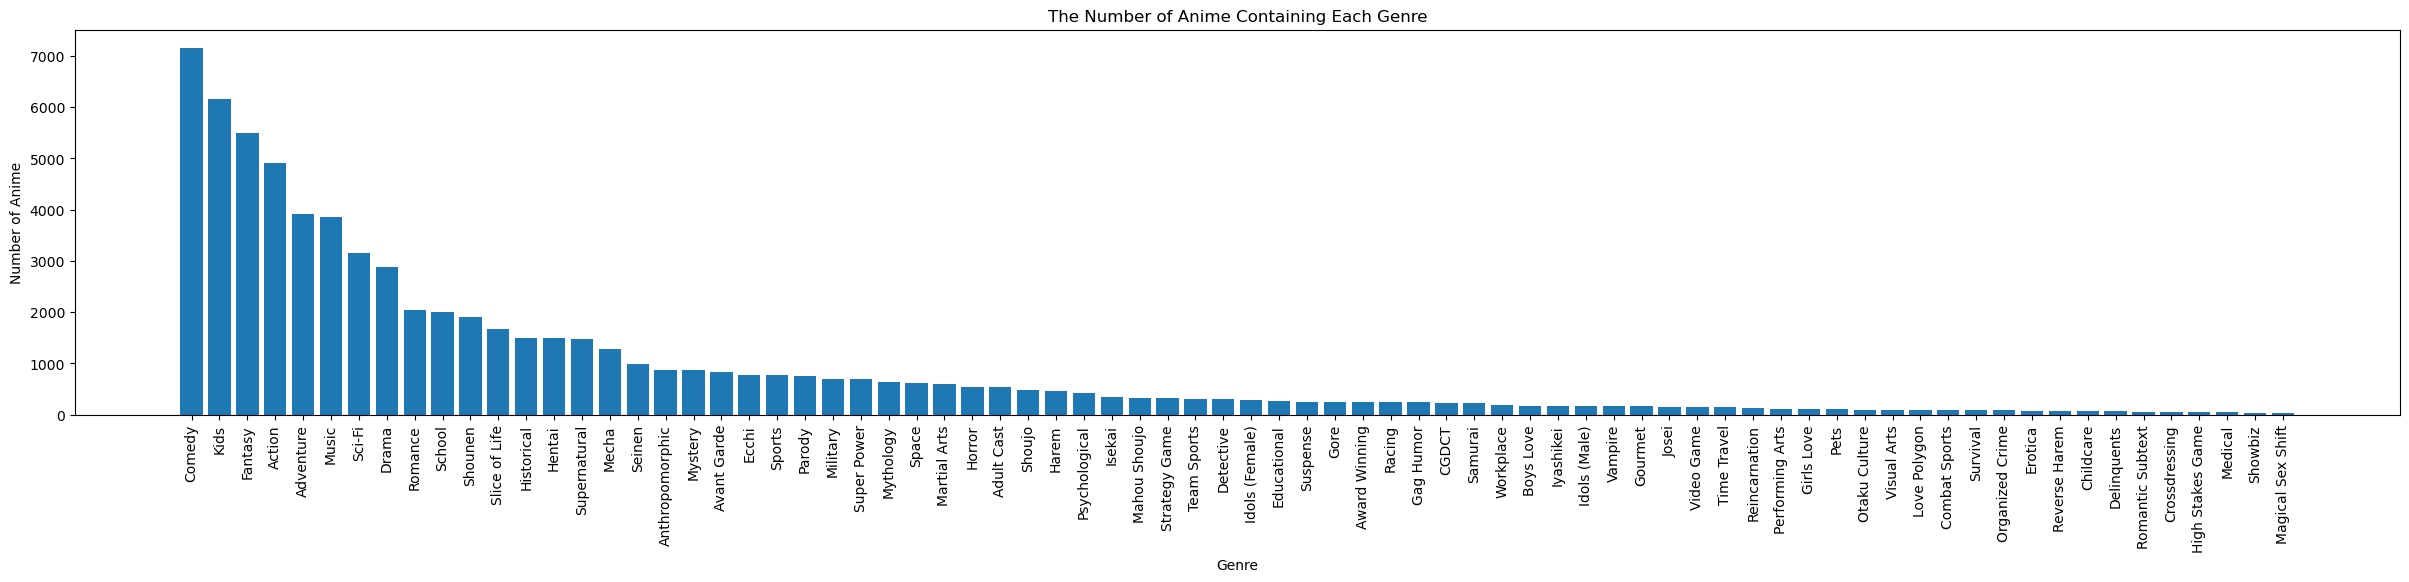

In [8]:
plt.figure(figsize=(30, 5))
plt.bar(genre_counts_df['genre'], genre_counts_df['count'])
plt.xlabel('Genre')
plt.ylabel('Number of Anime')
plt.title('The Number of Anime Containing Each Genre')
plt.xticks(genre_counts_df['genre'], genre_counts_df['genre'], rotation='vertical');

# Exploring User Ratings

### Get sum of data for each unique user

In [9]:
user_ids = user_ratings_df['user_id'].unique()

user_data_sums = {
    "user_id": [],
    "num_completed": [],
    "num_watching": [],
    "num_dropped": [],
    "num_plan_to_watch": [],
    "avg_num_eps_watched": [],
}

for user_id in user_ids:
    user_specific_ratings = user_ratings_df.query(f'user_id == {user_id}')
    
    user_data_sums['user_id'].append(user_id)

    user_data_sums['num_completed'].append(len(user_specific_ratings.query('status == "completed"')))
    user_data_sums['num_watching'].append(len(user_specific_ratings.query('status == "watching"')))
    user_data_sums['num_dropped'].append(len(user_specific_ratings.query('status == "dropped"')))
    user_data_sums['num_plan_to_watch'].append(len(user_specific_ratings.query('status == "plan_to_watch"')))
    
    user_data_sums['avg_num_eps_watched'].append(user_specific_ratings['num_episodes_watched'].mean())

user_data_sums_df = pd.DataFrame(user_data_sums)

In [10]:
user_data_sums_df.head()

,user_id,num_completed,num_watching,num_dropped,num_plan_to_watch,avg_num_eps_watched
0,0,74,7,1,8,27.301075
1,1,263,2,21,5,14.134021
2,2,81,9,4,32,11.552239
3,3,61,1,0,19,32.024390
4,4,250,37,21,82,17.585253


In [11]:
average_total_anime_watched = user_data_sums_df["num_completed"].mean() + user_data_sums_df["num_watching"].mean() + user_data_sums_df["num_dropped"].mean() + user_data_sums_df["num_plan_to_watch"].mean()

print(f'Users on avg. have completed {user_data_sums_df["num_completed"].mean()} anime')
print(f'Users on avg. have dropped {user_data_sums_df["num_dropped"].mean()} anime')
print(f'Users on avg. have dropped {user_data_sums_df["num_dropped"].mean()/average_total_anime_watched*100}% of the anime they rated.')

Users on avg. have completed 316.3764019226368 anime
Users on avg. have dropped 16.478484779125658 anime
Users on avg. have dropped 3.2976639304652764% of the anime they rated.


## Performing Data Pre-Processing

In [12]:
user_ratings_df.head()

,user_id,anime_id,score,status,num_episodes_watched,updated_at,start_date,finish_date
0,0,41457,7,completed,11,2023-02-16T10:18:23+00:00,NaN,2023-01-01
1,0,48569,7,watching,7,2023-03-09T11:11:20+00:00,2023-01-01,NaN
2,0,32998,9,completed,12,2023-04-15T14:29:11+00:00,NaN,2023-01-01
3,0,25013,0,plan_to_watch,0,2023-04-15T14:44:38+00:00,NaN,NaN
4,0,36649,7,completed,24,2023-04-15T14:29:23+00:00,NaN,2023-01-01


In [13]:
len(user_ratings_df['start_date'].unique())

6300

In [14]:
user_ratings_df.describe()

,user_id,anime_id,score,num_episodes_watched
count,4.488708e+06,4.488708e+06,4.488708e+06,4.488708e+06
mean,4.639700e+03,2.779843e+04,3.784011e+00,1.253268e+01
std,2.596975e+03,1.705422e+04,3.849875e+00,3.795063e+02
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.446000e+03,1.112300e+04,0.000000e+00,0.000000e+00
50%,4.691000e+03,3.236500e+04,4.000000e+00,2.000000e+00
75%,6.872000e+03,4.049600e+04,8.000000e+00,1.200000e+01
max,9.071000e+03,5.694900e+04,1.000000e+01,6.553500e+04


### Only include data on users with a minimum number of anime in their list

In [15]:
user_ratings_no_processing_df = user_ratings_df.copy()

In [16]:
user_ids = user_ratings_df['user_id'].unique()

minimum_anime_num = 50
for user_id in user_ids:
    if (len(user_ratings_df.query(f'user_id == {user_id}')) < minimum_anime_num):
        user_ratings_df = user_ratings_df[user_ratings_df.user_id != user_id]

In [17]:
percent_more_than_minimum = len(user_ratings_df['user_id'].unique()) / len(user_ratings_no_processing_df['user_id'].unique()) * 100
print(f'{percent_more_than_minimum}% of users have more than {minimum_anime_num} anime in their list')

89.09361409933624% of users have more than 50 anime in their list


### Remove Ratings With a Score of Zero

In [18]:
print(f'[Before] There are {len(user_ratings_no_processing_df.query("score == 0"))} ratings with a zero score')

user_ratings_df = user_ratings_df[user_ratings_df.score != 0]

print(f'[After] There are {len(user_ratings_df.query("score == 0"))} ratings with a zero score')

[Before] There are 2142478 ratings with a zero score
[After] There are 0 ratings with a zero score


### Only include anime a user has either completed or dropped

In [19]:
user_ratings_df['status'].unique()

array(['completed', 'watching', 'dropped', 'on_hold', 'plan_to_watch'],
      dtype=object)

In [20]:
user_ratings_df = user_ratings_df.query('status == "completed" or status == "dropped"')
user_ratings_df['status'].unique()

array(['completed', 'dropped'], dtype=object)

In [21]:
num_dropped = len(user_ratings_df.query('status == "dropped"'))
num_total = len(user_ratings_df['status'])
print(f'Percentage of anime users have dropped {num_dropped/num_total*100}')

Percentage of anime users have dropped 2.6118851723786176


## Rating Distribution Graph

### Get Specific Columns
Only the user id and score columns are needed.

In [22]:
user_id_score_df = user_ratings_df[['user_id', 'score']]
user_id_score_df.head()

,user_id,score
0,0,7
2,0,9
4,0,7
5,0,8
6,0,10


### Get a DataFrame of the Score Distribution

In [23]:
# Ignore Zero (Since that means no rating was given)
score_counts = user_id_score_df['score'].value_counts()

score_counts_dict = {'score': [], 'count': []}
for score, count in score_counts.items():
  score_counts_dict['score'].append(score)
  score_counts_dict['count'].append(count)

score_counts_counts_df = pd.DataFrame(score_counts_dict)
score_counts_counts_df.head()

,score,count
0,8,559119
1,7,538337
2,9,322532
3,6,297816
4,10,214592


### Plot the Bar Chart

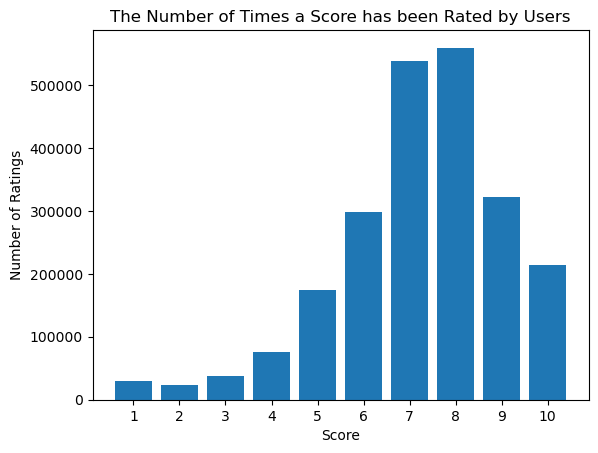

In [24]:
plt.bar(score_counts_counts_df['score'], score_counts_counts_df['count'])
plt.xlabel('Score')
plt.ylabel('Number of Ratings')
plt.title('The Number of Times a Score has been Rated by Users')
plt.xticks(score_counts_counts_df['score'], score_counts_counts_df['score']);

## Frenquency of Genres by User Ratings

### Get the DataFrame

In [25]:
genre_frequency_df = genre_counts_df.copy()
user_ratings_no_zero_score_df = user_ratings_df[user_ratings_df.score != 0]

for ind, row in anime_id_genre_split_df.iterrows():
  num_user_ratings = len(user_ratings_no_zero_score_df.loc[user_ratings_no_zero_score_df['anime_id'] == row['id']])
  genre_frequency_df.loc[genre_frequency_df['genre'] == row['genre'], 'count'] += num_user_ratings

In [26]:
genre_frequency_df.head()

,genre,count
0,Comedy,779224
1,Kids,45899
2,Fantasy,812534
3,Action,989945
4,Adventure,482066


### Plot the Bar Chart

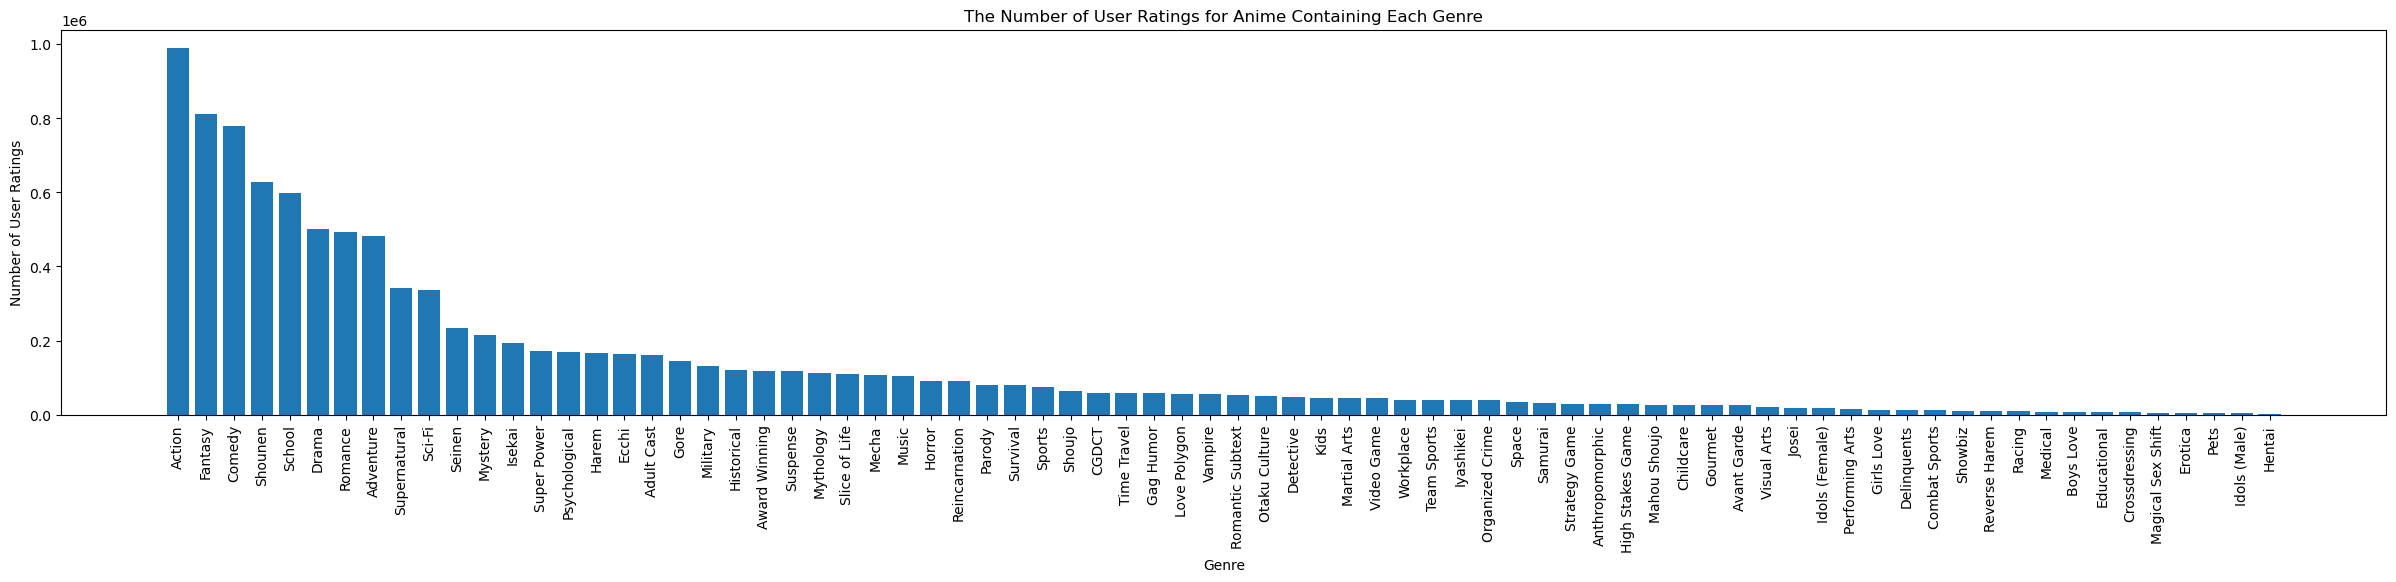

In [27]:
# Sort by Count
genre_frequency_df.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(30, 5))
plt.bar(genre_frequency_df['genre'], genre_frequency_df['count'])
plt.xlabel('Genre')
plt.ylabel('Number of User Ratings')
plt.title('The Number of User Ratings for Anime Containing Each Genre')
plt.xticks(genre_frequency_df['genre'], genre_frequency_df['genre'], rotation='vertical');